## Review on basic Python data visualziation and data summary 

### Goal for today： 

- Review on basic data structure
- Understand basic rules to choose figure type
- Learn how to describe data and simple figures 
- Review basic plotting options in Python (matplotlib and seaborn)


### Describing a data set

In a data table (also called ``data matrix"), like the one below. There are two dimensions in the data: 

- Observations: each individual subject, case, or sample point (rows, represented with $n$)
- Variables/Feature: characteristics that are recorded for each subject in the sample (columns, represented with $p$)


In [1]:
import pandas as pd

df = pd.read_csv("ICUAdmissions.csv")
print(df.head())

   ID  Status  Age  Sex  Race  Service  Cancer  Renal  Infection  CPR  ...  \
0   8       0   27    1     1        0       0      0          1    0  ...   
1  12       0   59    0     1        0       0      0          0    0  ...   
2  14       0   77    0     1        1       0      0          0    0  ...   
3  28       0   54    0     1        0       0      0          1    0  ...   
4  32       0   87    1     1        1       0      0          1    0  ...   

   HeartRate  Previous  Type  Fracture  PO2  PH  PCO2  Bicarbonate  \
0         88         0     1         0    0   0     0            0   
1         80         1     1         0    0   0     0            0   
2         70         0     0         0    0   0     0            0   
3        103         0     1         1    0   0     0            0   
4        154         1     1         0    0   0     0            0   

   Creatinine  Consciousness  
0           0              1  
1           0              1  
2           0    

### Describing variables

There are at least two ways to describe variables:
		
By value type:
		
- Numerical variables: take on numerical values with meaning Mathematical operations like addition, etc. must make sense
- Categorical variables: take on names, categories, or labels Categories are sometimes represented by numbers...

By function:
		
- Response variable/Target: defined by the particular research question a study seeks to address, and measures the outcome of interest in the study
- Explanatory variable/Feature: a secondary variable(s) that explains changes in the response variable

### Important terminology clarification

- feature
- variable
- attribute

### In-class activities

Suppose my research question is "What factors may be related to the heart rate in ICU admissions?" Try to make three data viasualizations. 

Things you need to decide: 
- What features I want to choose for the data visualizaiton?
- What type of figures I will choose? 
- What information I want to achieve from the data visualization?
- ......


In [2]:
# graphs i could make: bar, scatter, histogram
# important columns that relate to heart rate icu admissions
    # age, sex, race, hear rate, infection

In [3]:
import matplotlib.pyplot as plt

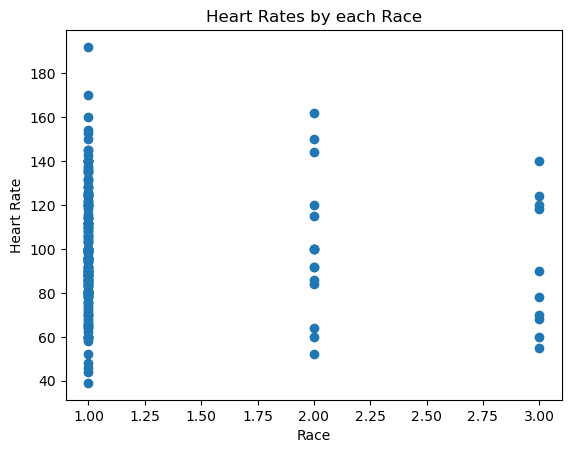

In [4]:
# Example 1: a distribution about the target value ( heart rate)
x = df['Race']
y = df['HeartRate']

plt.xlabel('Race')
plt.ylabel('Heart Rate')
plt.title('Heart Rates by each Race')
plt.scatter(x,y)

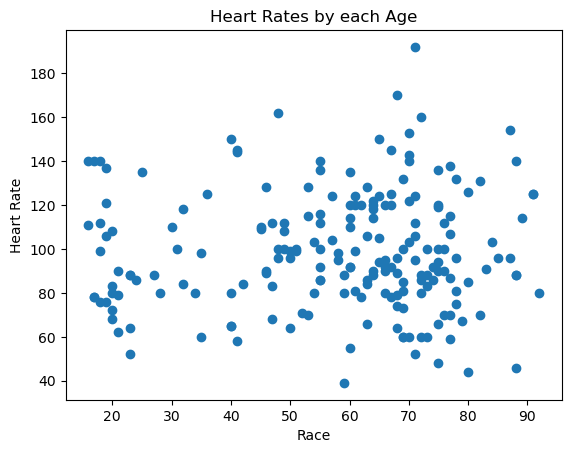

In [5]:
# Example 2: scatter plot between heart rate vs something
# something can be 1. the variable you believe it is important
                # 2. the variable gives you a trend in the visualizations
x = df['Age']
y = df['HeartRate']

plt.xlabel('Race')
plt.ylabel('Heart Rate')
plt.title('Heart Rates by each Age')
plt.scatter(x,y)

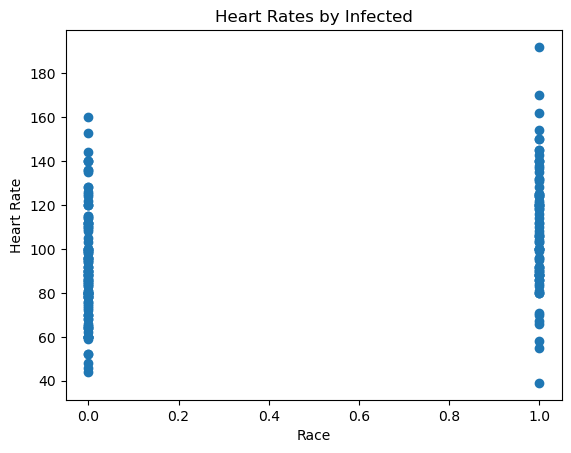

In [6]:
# Example 3: same as eample 2
# Example 1: 
x = df['Infection']
y = df['HeartRate']

plt.xlabel('Race')
plt.ylabel('Heart Rate')
plt.title('Heart Rates by Infected')
plt.scatter(x,y)

### Basic data visualization choices

Here is a general guidline for the type of plots: 

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot (sankey diagram and treemap)

#### One categorical: bar plot

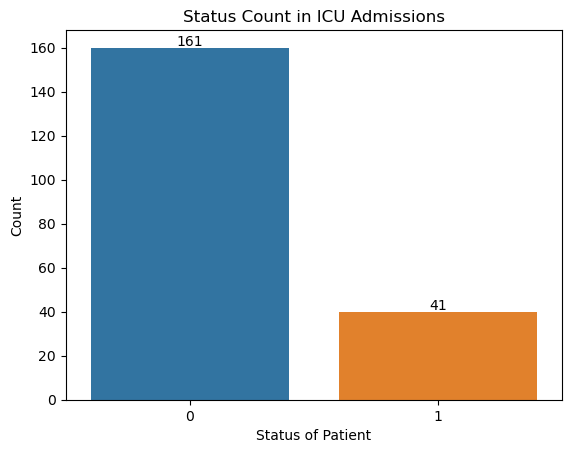

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = 'Status', data = df)

plt.xlabel('Status of Patient')
plt.ylabel('Count')
plt.title('Status Count in ICU Admissions')

status_counts = df['Status'].value_counts()


for i, value in enumerate(status_counts.values):
    plt.text(i, value  + 1, f'{value + 1}', ha = 'center')
    
plt.show()

Text(0, 0.5, 'Percentage')

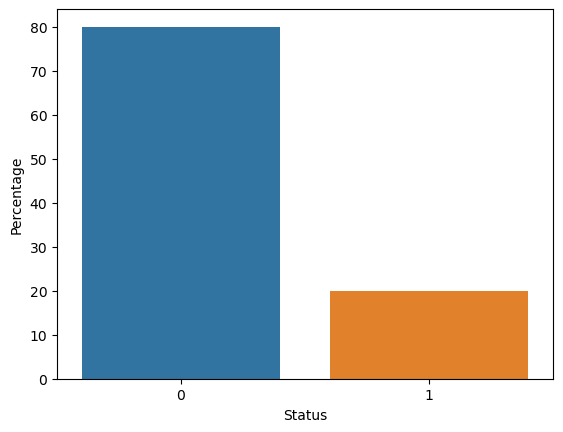

In [8]:
status_counts = df['Status'].value_counts(normalize = True)*100

sns.barplot(x = status_counts.index, y = status_counts.values)
plt.xlabel('Status')
plt.ylabel('Percentage')

##### What to write about a bar plot

- what this plot is about? (what feature)
    ex. the figure is about the number of people survived in the icu admissions. Status '0'
     means the patient has survived in the ICU while '1' means the patient died in the ICU. Among the 200 patiends, 160(80%)
     of them survived while 40 (20%) of them died. More people seem to survive in the ICU
 - percentage/count for each group
- whether there is a clear difference on the percentage/count


#### One continous: histogram/density plot/boxplot

Text(0.5, 1.0, 'Heart Rate Distribution in ICU Adimissions')

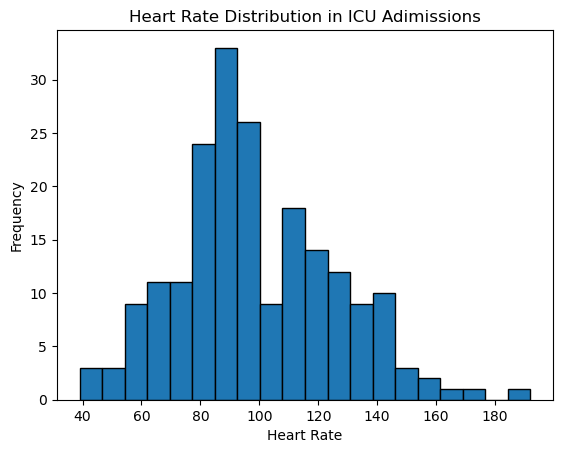

In [9]:
plt.hist(df['HeartRate'], bins = 20, edgecolor = 'black')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution in ICU Adimissions')

<AxesSubplot:xlabel='HeartRate', ylabel='Count'>

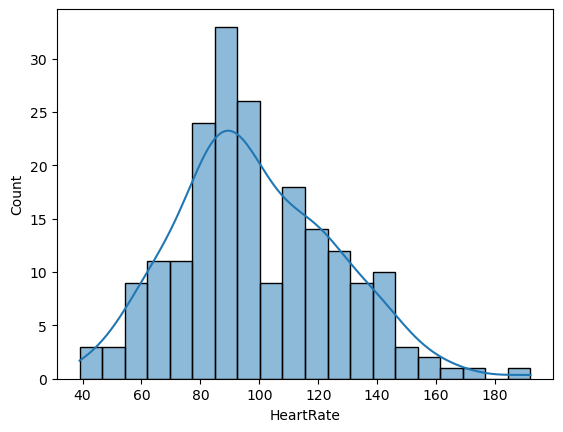

In [10]:
sns.histplot(df['HeartRate'], kde= True, bins = 20, edgecolor = 'black')


In [12]:
# sns.kdeplot(df['HeartRate'], kde= True, bins = 20)


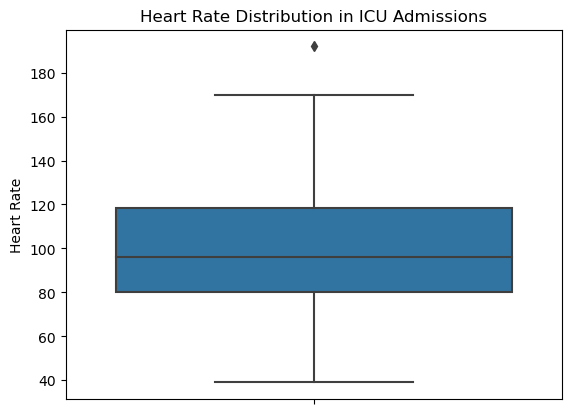

In [13]:
sns.boxplot(y = 'HeartRate', data=df)
plt.ylabel('Heart Rate')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

In [14]:
df['HeartRate'].describe()

count    200.00000
mean      98.92500
std       26.82962
min       39.00000
25%       80.00000
50%       96.00000
75%      118.25000
max      192.00000
Name: HeartRate, dtype: float64

##### Difference between histogram/density plot/ boxplot

- Histogram and denity plot emphasizes on the ditrubtion of the data
- boxplot emphasizes on the stats of the data (median/IQR)
- boxplot cannot catch the distribution informtion(bi-mode)
- histogram needs to choose the bin number and density plot needs to choose the bandwith
- if you have multitple groups, boxplot and density plot can easily show the things sside-byside while the histogram is hard to overlap with each other

##### Difference between histogram and bar plot

- histogram is for numerical features and bar plot is for categorical ones
- histogram almost always in vertical while bar plot can be horizontal
- histogram usually does not have spaces between bars but bar plot will
- histogram's bar order can not change, but you can with bar plot


##### What to write about a histogram/density plot

- what the plot is about?
- shape(skewness and mode)
- majority of the data (typical value mean $\pm$ standard deviation)
- potential outliers 

<img src="https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png" width="700" height="300">

Ex. the figure is aout the distribution of heart rate among ICU Admissions. The heart rate has a uni-mode distribution and it is slightly skewed to the right( positively skewed), which means it may have a potential outlier with larger values. The typical value is within the range of 98.9 $\pm$ 26.8

##### What to write about a box plot

- what the plot is about?
- can also comment on the skewness but not the mode
- majority of data (IQR)
- potential outliers

EX. The figure is the boxplot of the heart rate distribution in ICU admissions. it seems that the distruvtion is slightly skewed at the right and it may have a potenitial outlier with large values. the IQR range is from 80 to 118.25

#### Two continous: scatter plot

Text(0, 0.5, 'Heart Rate')

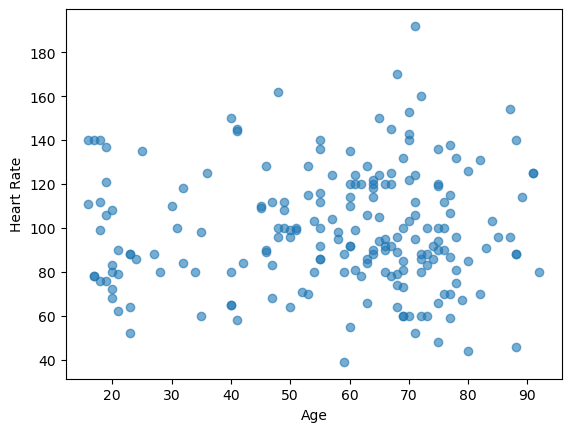

In [15]:
plt.scatter(df['Age'], df['HeartRate'], alpha = .6)
plt.xlabel('Age')
plt.ylabel('Heart Rate')


##### What to write about a scatter plot

- what is the plot about
- tend (linear or non linear
- outlier or cluster

EX. the figure shows the relationship between age and heart rate among ICU amissions. there is no clear linear or non-linear trend in the figure and there is no clear outlier. There might be a cluster for the age between age 60 and 80 and hear frate from 100 to 120

#### One categorical and one continous: side-by-side boxplot

Other choices include side-by-side histogram and side-by-side density plot

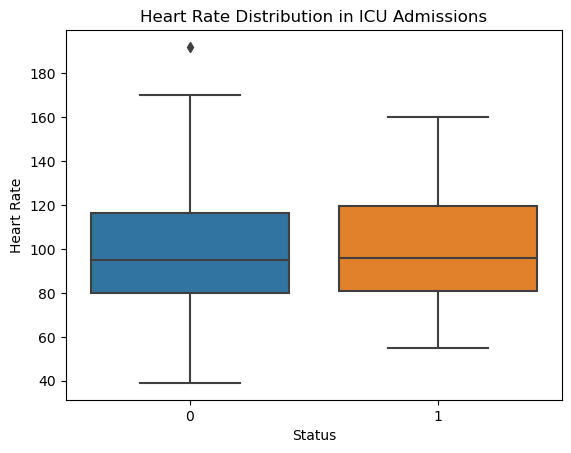

In [16]:
sns.boxplot(x = 'Status', y = 'HeartRate', data=df)
plt.xlabel('Status')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

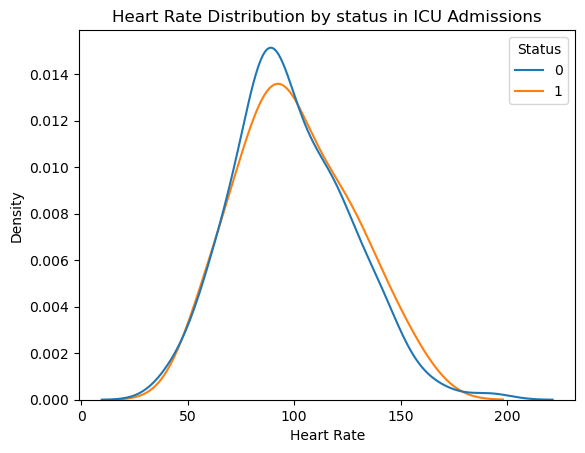

In [17]:
sns.kdeplot(x = 'HeartRate', hue = 'Status', data=df ,common_norm = False)
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.title('Heart Rate Distribution by status in ICU Admissions')
plt.show()

##### What to write about a side-by-side boxplot or density plot

- what the plot is about?
- highlight the comparison
- for the boxplot, declare whether the box parts are overlapping

EX. the figure is the side-by-side boxplot for heart rate vs. status. the box parts are overlapped, thus there might not be a significant difference between the two groups on heart rate distribution


Text(0, 0.5, 'HeartRate')

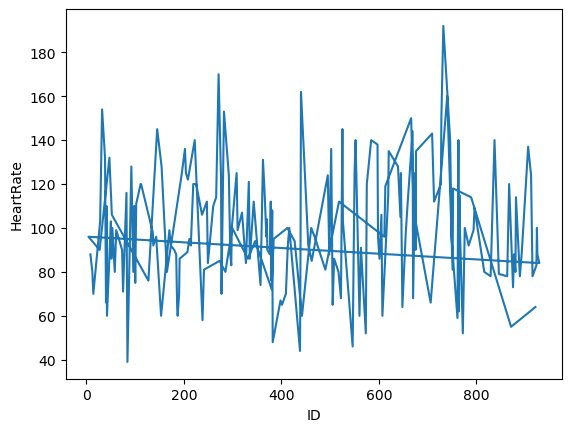

In [18]:
# line plot
plt.plot(df['ID'], df['HeartRate'])
plt.xlabel('ID')
plt.ylabel('HeartRate')

#### Two categorical: side-by-side bar plot

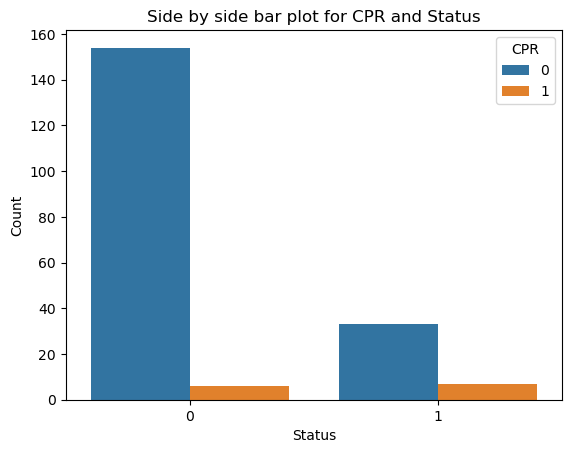

In [19]:
# CPR vs Status
df['CPR'] = df['CPR'].astype('str')
sns.countplot(x = 'Status', hue = 'CPR', data = df)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Side by side bar plot for CPR and Status')
plt.show()

In [20]:
proportion_table = pd.crosstab(df['Status'], df['CPR'], normalize = 'all')
# proportion_table = pd.crosstab(df['Status'], df['CPR'], normalize = 'index')
# proportion_table = pd.crosstab(df['Status'], df['CPR'])

proportion_table

CPR,0,1
Status,,
0,0.770,0.030
1,0.165,0.035


Text(0.5, 1.0, 'Stacked bar plot status by CPR')

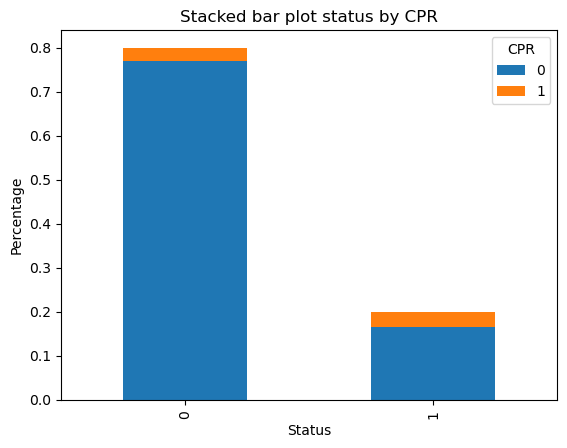

In [21]:
proportion_table.plot(kind = 'bar', stacked = True)
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title('Stacked bar plot status by CPR')

##### What to write about a side-by-side bar plot

- what the plot is about
- highlight of the comparison

EX. the figure is a stacked bar plot for the status vs CPR. The color is indicating whether the paitient using CPR in each group. From the figure, it seems the districution of CPR use is different for the survival group and non-survival group. In the survival group, there are much large proportion of people not using CPR. Notice that even though CPR use and survival group are correlated in the figure, does not mean that one causes the other

### In-class activities: Try to make data visualizaiton by yourself

See the data with about Titanic. Try to make three data visualization to study how other features affect the "survived" (whether the person survived from the Titanic disaster). Once you finish, show your figures to the neighbors and describe the figures to them. 

Note: This is not a complete data, feel free to remove the missing valuesv(or do any other data pre-processing) before you making the plots. 

In [22]:
titanic_data = sns.load_dataset('titanic')
print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [23]:
titanic_data['deck'] = titanic_data['deck'].dropna()

In [24]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

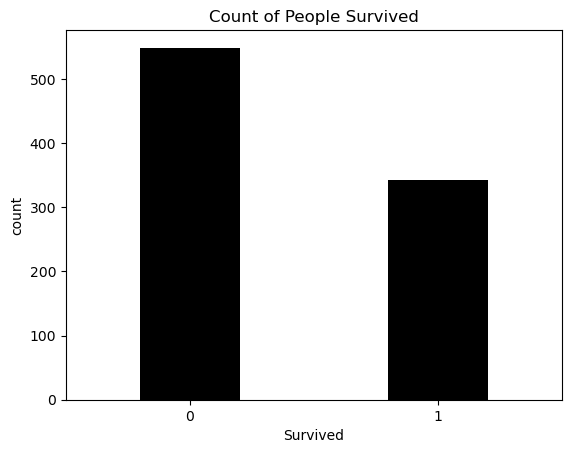

In [54]:
sns.countplot(x = titanic_data['survived'],data = titanic_data, color='black', width = .4)
plt.xlabel('Survived')
plt.title('Count of People Survived')
plt.savefig('plot_1.png')

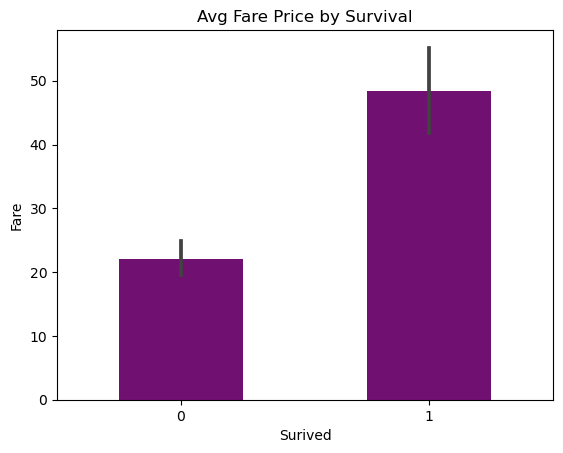

In [64]:
sns.barplot(x = titanic_data['survived'], y = titanic_data['fare'], color = 'purple', width = .5)
plt.xlabel('Surived')
plt.ylabel('Fare')
plt.title('Avg Fare Price by Survival')
plt.savefig('plot_2.png')

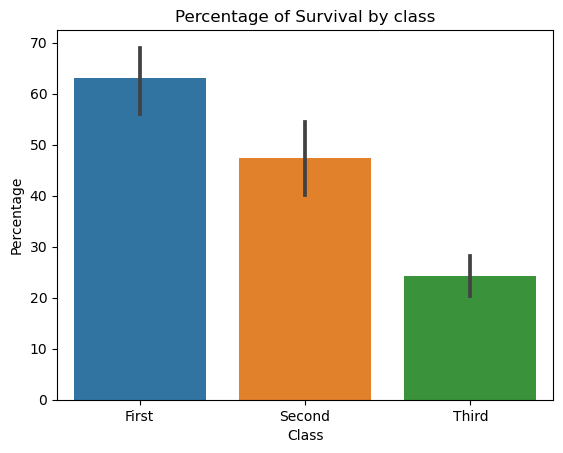

In [56]:
sns.barplot(x = titanic_data['class'], y = titanic_data['survived']*100)
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Percentage of Survival by class')
plt.savefig('plot_3.png')

#### Other options

Matplotlib and seaborn also allow you to do some level of customization. 
Read the documents here to change color/size/shape for your plot. Save your work to submit to the quiz later. 

https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html


### Conclusion

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot

But, wait, why?

In-class activities: discuss what other options you want to have for your plots?